# Writing data to and reading data from a Database using Python

## Libraries and settings

In [28]:
# Libraries
import os
import sqlite3
import fnmatch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Function to close a sqlite db-connection
def check_conn(conn):
     try:
        conn.cursor()
        return True
     except Exception as ex:
        return False

# Get current working directory
print(os.getcwd())

C:\Dev\Studium\Sem5\DA\data_analytics\Week_02


## Create sqlite data base

In [29]:
# Create data base
conn = sqlite3.connect('apartment_database.db') 
cursor = conn.cursor()

# Show dbs in the directory
flist = fnmatch.filter(os.listdir('.'), '*.db')
for i in flist:
    print(i)

apartment_database.db


## Create SQL-table in the database

In [30]:
cursor.execute('''CREATE TABLE IF NOT EXISTS apartments_table (OrderId VARCHAR(50),
                                                               Adress VARCHAR(200),
                                                               Rooms DECIMAL(8,2),
                                                               Area INT(8),
                                                               Price DECIMAL(8,2))''')
# Confirm changes to the table
conn.commit()

## Read data from file to data frame

In [31]:
df = pd.read_csv('apartments_data_prepared.csv',
                  sep=',', 
                  encoding='utf-8')[['web-scraper-order', 'address_raw', 'rooms', 'area', 'price']]
print(df.shape)
df.head(5)

(1008, 5)


,web-scraper-order,address_raw,rooms,area,price
0,1693998201-1,"Neuhusstrasse 6, 8630 Rüti ZH, ZH",3.0,49.0,1441.0
1,1693998201-2,"Zürcherstrasse 1, 8173 Neerach, ZH",3.5,65.0,1850.0
2,1693998201-3,"Cramerstrasse 8-12, 8004 Zürich, ZH",NaN,NaN,2686.0
3,1693998201-4,"Cramerstrasse 8-12, 8004 Zürich, ZH",2.0,54.0,4853.0
4,1693998201-5,"Rotachstrasse 33, 8003 Zürich, ZH",2.0,49.0,4335.0


## Write data to the SQL-table in data base

In [32]:
df.to_sql(name = 'apartments_table',
          con = conn,
          index = False,
          if_exists = 'replace')

1008

## Query the SQL-table

In [33]:
# Query the SQL-table
cursor.execute('''SELECT *
               FROM apartments_table
               WHERE rooms >=1''')

df = pd.DataFrame(cursor.fetchall(), 
                  columns=['OrderId','Address','Rooms','Area','Price'])    
df

,OrderId,Address,Rooms,Area,Price
0,1693998201-1,"Neuhusstrasse 6, 8630 Rüti ZH, ZH",3.0,49.0,1441.0
1,1693998201-2,"Zürcherstrasse 1, 8173 Neerach, ZH",3.5,65.0,1850.0
2,1693998201-4,"Cramerstrasse 8-12, 8004 Zürich, ZH",2.0,54.0,4853.0
3,1693998201-5,"Rotachstrasse 33, 8003 Zürich, ZH",2.0,49.0,4335.0
4,1693998201-16,"Wolframplatz 1, 8045 Zürich, ZH",2.0,32.0,3515.0
...,...,...,...,...,...
958,1693998381-1004,"Hölderlinstrasse 12, 8032 Zürich, ZH",3.5,82.0,2830.0
959,1693998381-1005,"Hegifeldstrasse 70, 8404 Reutlingen (Winterthu...",4.0,73.0,1713.0
960,1693998381-1006,"Holzmoosrütisteig 2b, 8820 Wädenswil, ZH",4.5,110.0,3500.0
961,1693998381-1007,"Vogelbuckstrasse 25, 8307 Effretikon, ZH",3.0,68.0,1650.0


## Plot histogramm of rental prices

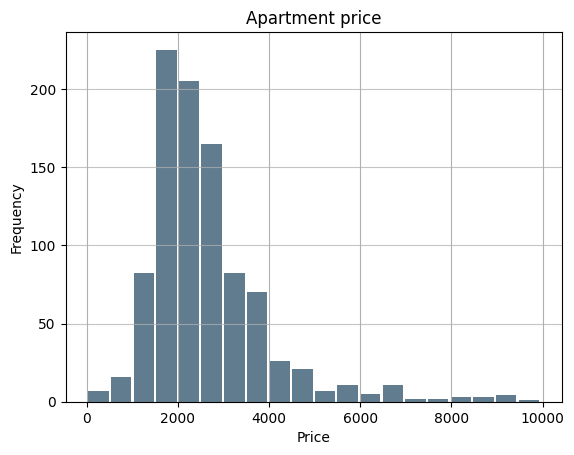

In [34]:
df.Price.plot.hist(grid=True, 
                   bins=20, 
                   rwidth=0.9,
                   color='#607c8e')
plt.title('Apartment price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

## Additional SQL-queries

c)

In [35]:
cursor.execute('''SELECT *
    FROM apartments_table
    WHERE Rooms >= 4.0
    AND Area >= 100;''')

df = pd.DataFrame(cursor.fetchall(),
                  columns=['OrderId','Address','Rooms','Area','Price'])
df

,OrderId,Address,Rooms,Area,Price
0,1693998205-26,"Frowiesstrasse 36, 8344 Bäretswil, ZH",5.5,140.0,2750.0
1,1693998205-27,"Kanzleistrasse 15, 8418 Schlatt ZH, ZH",4.5,104.0,2700.0
2,1693998205-29,"Bolletweg 14, 8934 Knonau, ZH",5.5,150.0,3390.0
3,1693998205-31,"Adlergass 6, 8805 Richterswil, ZH",5.5,165.0,NaN
4,1693998205-33,"Haldenstrasse 67, 8602 Wangen b. Dübendorf, ZH",4.5,118.0,3390.0
...,...,...,...,...,...
234,1693998381-998,"Tösstalstrasse 12, 8492 Wila, ZH",4.5,109.0,1980.0
235,1693998381-999,"Murzlenstrasse 66, 8166 Niederweningen, ZH",4.5,111.0,2700.0
236,1693998381-1001,"Murzlenstrasse 66, 8166 Niederweningen, ZH",4.5,111.0,2800.0
237,1693998381-1006,"Holzmoosrütisteig 2b, 8820 Wädenswil, ZH",4.5,110.0,3500.0


d)

In [36]:
cursor.execute('''SELECT Rooms, ROUND(AVG(Price), 2) AS AvgPrice
    FROM apartments_table
    WHERE Rooms IS NOT NULL AND Price IS NOT NULL
    GROUP BY Rooms
    ORDER BY Rooms;''')

df = pd.DataFrame(cursor.fetchall(), columns=['Rooms','AvgPrice'])

# Optional: sicherstellen, dass beide Spalten numerisch sind und verbleibende NaN entfernen
df['Rooms'] = pd.to_numeric(df['Rooms'], errors='coerce')
df['AvgPrice'] = pd.to_numeric(df['AvgPrice'], errors='coerce')
df = df.dropna(subset=['Rooms','AvgPrice']).reset_index(drop=True)

df

,Rooms,AvgPrice
0,1.0,1290.31
1,1.5,2036.42
2,2.0,2133.38
3,2.5,2450.91
4,3.0,2112.02
5,3.5,2643.37
6,4.0,2890.26
7,4.5,3029.43
8,5.0,2993.33
9,5.5,3557.16


e)

In [37]:
cursor.execute('''
SELECT Rooms, ROUND(AVG(Area), 2) AS AvgArea
FROM apartments_table
WHERE Rooms IS NOT NULL AND Area IS NOT NULL
GROUP BY Rooms
ORDER BY Rooms
''')
df = pd.DataFrame(cursor.fetchall(), columns=['Rooms','AvgArea'])
df['Rooms'] = pd.to_numeric(df['Rooms'], errors='coerce')
df['AvgArea'] = pd.to_numeric(df['AvgArea'], errors='coerce')
df = df.dropna(subset=['Rooms','AvgArea']).reset_index(drop=True)
print("e) Average area per room size")
print(df.head())

e) Average area per room size
   Rooms  AvgArea
0    1.0    32.09
1    1.5    35.53
2    2.0    54.43
3    2.5    67.32
4    3.0    68.98


## Close db connection (if open)

In [38]:
# Close db connection (if open)
try:
    if check_conn(conn):
        conn.close()
    else:
        pass
except:
    pass

# Status (True = open, False = closed)
print(check_conn(conn))

False


### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [39]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
NT
Windows | 11
Datetime: 2025-09-24 18:39:29
Python Version: 3.13.7
-----------------------------------
